# 미니프로젝트 : 가위바위보 분류기를 만들자

## 1. 데이터 불러오기 + Resize 하기

#### PIL 라이브러리 불러오기

In [439]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 가위 - 이미지의 크기 28x28로 변경하기

In [440]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2421  images to be resized.
2421  images resized.
가위 이미지 resize 완료!


#### 바위 - 이미지의 크기 28x28로 변경하기

In [441]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

2439  images to be resized.
2439  images resized.
바위 이미지 resize 완료!


#### 보 - 이미지의 크기 28x28로 변경하기

In [442]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2455  images to be resized.
2455  images resized.
보 이미지 resize 완료!


#### 데이터읽기 및 라벨링

In [498]:
import numpy as np

def load_data(img_path, number_of_data=7315):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7315 입니다.
x_train shape: (7315, 28, 28, 3)
y_train shape: (7315,)


#### 이미지 불러오기 (x_train[0])

라벨:  0


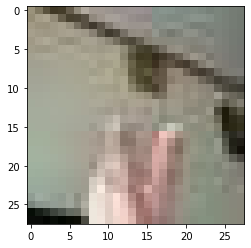

In [499]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [500]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [501]:
# 랜덤시드 고정시키기
np.random.seed(3)


#### 모델 만들기

n_channel_1=20
n_channel_2=20
n_channel_3=40
n_dense=16
n_train_epoch=13

In [502]:

"""
n_channel_1=8
n_channel_2=16
n_channel_3=16
n_dense=10
"""

n_channel_1=20
n_channel_2=40
n_channel_3=30
n_dense=16
n_train_epoch=10

# ,padding="SAME"
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()  

Model에 추가된 Layer 개수:  9
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 26, 26, 20)        560       
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 3, 3, 30)          10830     
_________________________________________________________________
max_pooling2d_118 (MaxPoolin (None, 1, 1, 30)          0         
_________________________________________________________________
flatten_40 (Flatten)         

## 3. 딥러닝 네트워크 학습시키기

#### 채널수에 대한 정보를 넣기위해 reshape 해주기 => 기존에 채널 수에 대한 정보가 존재하므로 생략해도 상관없어보인다

In [503]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))



Before Reshape - x_train_norm shape: (7315, 28, 28, 3)
After Reshape - x_train_reshaped shape: (7315, 28, 28, 3)


#### x_train 학습데이터로 딥러닝 네트워크 학습시키기

In [504]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


#### 이미지 증강(Image Augmentation) :  알고리즘이 이미지의 불변하는 표현(invariant representation)을 학습하는 것

In [505]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rotation_range=10,shear_range=0.5,width_shift_range=0.15, height_shift_range=0.10, horizontal_flip=True)



model.fit_generator(datagen.flow(x_train_reshaped, y_train,batch_size=32),
                    steps_per_epoch=x_train_reshaped.shape[0]//32,epochs=n_train_epoch,verbose=2)
        
#model.fit(x_train_reshaped, y_train,epochs=n_train_epoch)        

Epoch 1/10
228/228 - 24s - loss: 1.0974 - accuracy: 0.3459
Epoch 2/10
228/228 - 3s - loss: 1.0548 - accuracy: 0.4185
Epoch 3/10
228/228 - 3s - loss: 0.8711 - accuracy: 0.5896
Epoch 4/10
228/228 - 3s - loss: 0.7706 - accuracy: 0.6528
Epoch 5/10
228/228 - 3s - loss: 0.6888 - accuracy: 0.6922
Epoch 6/10
228/228 - 3s - loss: 0.6331 - accuracy: 0.7259
Epoch 7/10
228/228 - 3s - loss: 0.5815 - accuracy: 0.7531
Epoch 8/10
228/228 - 3s - loss: 0.5499 - accuracy: 0.7636
Epoch 9/10
228/228 - 3s - loss: 0.5054 - accuracy: 0.7918
Epoch 10/10
228/228 - 3s - loss: 0.4847 - accuracy: 0.7980


## 4. 얼마나 잘 만들었지 확인하기

#### test셋으로 얼마나 잘 만들었는지 확인하기

#### test용 데이터 불러오기 + Resize 하기

In [506]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


def load_data(img_path, number_of_data=1527):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

509  images to be resized.
509  images resized.
가위 이미지 resize 완료!
509  images to be resized.
509  images resized.
바위 이미지 resize 완료!
509  images to be resized.
509  images resized.
보 이미지 resize 완료!
테스트데이터(x_train)의 이미지 개수는 1527 입니다.
x_test shape: (1527, 28, 28, 3)
y_test shape: (1527,)


#### 이미지 불러오기(x_test[457])

라벨:  0


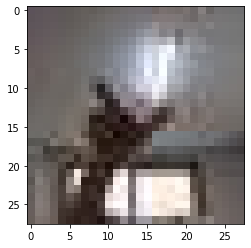

In [507]:
import matplotlib.pyplot as plt
plt.imshow(x_test[457])
print('라벨: ', y_test[457])

#### 훈련시킨 model을 사용하여 test_accuracy 측정하기

In [508]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

48/48 - 4s - loss: 0.9302 - accuracy: 0.6929
test_loss: 0.9301647543907166 
test_accuracy: 0.692861795425415


****

## <회고>

여러분 오늘 노드에도 옥의 티가 있는데 찾으셨나요ㅎㅎ? 12-4 파일 경로와 12-7의 파일 경로가 달라 코드를 조금 수정해줄 필요가 있습니다. 이 부분 주의해서 노드 진행해 주시면 되겠습니다!

1. train set 불균형 ? 가위의 데이터보다 바위와 보의 데이터 개수가 150개정도 많아서 대충 맞춰주었다 => 0.38~0.42 왔다갔다
2. 필터 개수를 늘리니 정확도가 올라감 => 모델이 복잡해질수록 오버피팅의 확률이 높아진다고 하여 다른 방법을 찾아봄 ==> 0.60 정도
3. 층을 하나 더 만들어줌 (층이 깊어질수록 정확도가 좋아진다고 하여) =>정확도가 올라감 
3. train set 개수가 적은거 같아 데이터증강을 하였음 => 정확도가 올라감 ==> 조금..?
4. train데이터를 자체를 추가해서 더 증가시켜봄 (양재캠퍼스 데이터까지 합하기) => 증강없애고 적용,,, 좀 올라감 0.48정도..? 많이 되면 
7. test set을  train set과 전혀 다른, 새로운 데이터 2명의 데이터를 가져왓다 너무 일반화된..? test set인거 같다=> test set 이 다양하지 않은 거 같으므로 여러명(5명)의데이터를 test set으로 사용하고자 함 => 0.57~0.6나옴
8. 이미지 증강적용 => 올랐다
9. 
14. 보류. 패딩 파라미터 추가

* 에폭이 높다고 좋은것이 아니다
* 정확도가 높다고 테스트 정확도가 높은건 아니다
* n_channel_1=20
n_channel_2=40
n_channel_3=40
n_dense=16
n_train_epoch=10 에폭을 줄였는데 228/228 - 3s - loss: 0.5056 - accuracy: 0.7920 => 테스트 정확도 0.6797642707824707
/늘렸을때는 마지막에 99퍼가 나왔지만 test정확도는 더 떨어졌다
